In [162]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas 
!pip install numpy 
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [163]:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [164]:
# Read cuci_tanga.csv
cuci_tangan_df = pd.read_csv("cuci_tangan.csv")
# Remove line 1
cuci_tangan_df = cuci_tangan_df.drop([0])
# Rename columns
cuci_tangan_df.columns = ['Wilayah', 'Persentase']
# Remove all rows with missing values ('-') or NAN
cuci_tangan_df = cuci_tangan_df[cuci_tangan_df.Persentase != '-']
cuci_tangan_df = cuci_tangan_df.dropna()
# drop last row
cuci_tangan_df = cuci_tangan_df.drop(cuci_tangan_df.index[-1])
# Convert 'Persentase' to float
cuci_tangan_df['Persentase'] = cuci_tangan_df['Persentase'].astype(float)

print(cuci_tangan_df.head())
cuci_tangan_df.dtypes
cuci_tangan_df.describe()

         Wilayah  Persentase
1           ACEH        31.6
2       Simeulue        28.0
3   Aceh Singkil        49.7
4   Aceh Selatan        21.5
5  Aceh Tenggara        19.7


,Persentase
count,547.000000
mean,44.025777
std,16.727384
min,0.300000
25%,33.800000
50%,45.800000
75%,56.150000
max,79.100000


In [165]:
# Read house_size.csv
house_size_df = pd.read_csv("house_size.csv")
# Remove line 1
house_size_df = house_size_df.drop([0])
# Rename columns
house_size_df.columns = ['Wilayah', 'Persentase']
# Remove all rows with missing values ('-') or NAN
house_size_df = house_size_df[house_size_df.Persentase != '-']
house_size_df = house_size_df.dropna()
# drop last row
house_size_df = house_size_df.drop(house_size_df.index[-1])
# Convert 'Persentase' to float
house_size_df['Persentase'] = house_size_df['Persentase'].astype(float)

print(house_size_df.head())
house_size_df.dtypes
house_size_df.describe()

         Wilayah  Persentase
1           ACEH       13.23
2       Simeulue       14.14
3   Aceh Singkil       20.40
4   Aceh Selatan        9.17
5  Aceh Tenggara       15.57


,Persentase
count,547.000000
mean,12.429122
std,10.184029
min,0.140000
25%,6.155000
50%,10.050000
75%,15.940000
max,88.180000


In [166]:

# Read jumlah_komuter.csv
jumlah_komuter_df = pd.read_csv("jumlah_komuter.csv")
# Remove line 1
jumlah_komuter_df = jumlah_komuter_df.drop([0])
# Rename columns
jumlah_komuter_df.columns = ['Wilayah', 'Persentase']
# Remove all rows with missing values ('-') or NAN
jumlah_komuter_df = jumlah_komuter_df[jumlah_komuter_df.Persentase != '-']
jumlah_komuter_df = jumlah_komuter_df.dropna()
# drop last row
jumlah_komuter_df = jumlah_komuter_df.drop(jumlah_komuter_df.index[-1])
# Convert 'Persentase' to float
jumlah_komuter_df['Persentase'] = jumlah_komuter_df['Persentase'].astype(float)

print(jumlah_komuter_df.head())
jumlah_komuter_df.dtypes
jumlah_komuter_df.describe()

         Wilayah  Persentase
1           ACEH        1.55
3   Aceh Singkil        0.04
4   Aceh Selatan        0.22
5  Aceh Tenggara        0.11
6     Aceh Timur        0.45


,Persentase
count,494.000000
mean,2.076478
std,2.673484
min,0.020000
25%,0.362500
50%,0.970000
75%,2.615000
max,18.520000


In [167]:

# Read morbiditas.csv
morbiditas_df = pd.read_csv("morbiditas.csv")
# Remove line 1
morbiditas_df = morbiditas_df.drop([0])
# only keep the first 2 columns
morbiditas_df = morbiditas_df.iloc[:, :2]
# Rename columns
morbiditas_df.columns = ['Wilayah', 'Persentase']
# Remove all rows with missing values ('-') or NAN
morbiditas_df = morbiditas_df[morbiditas_df.Persentase != '-']
morbiditas_df = morbiditas_df.dropna()
# drop last row
morbiditas_df = morbiditas_df.drop(morbiditas_df.index[-1])
# Convert 'Persentase' to float
morbiditas_df['Persentase'] = morbiditas_df['Persentase'].astype(float)

print(morbiditas_df.head())
morbiditas_df.dtypes
morbiditas_df.describe()

         Wilayah  Persentase
1           ACEH       16.68
2       Simeulue       12.46
3   Aceh Singkil       16.81
4   Aceh Selatan       16.16
5  Aceh Tenggara       15.80


,Persentase
count,548.000000
mean,14.798248
std,4.668340
min,0.770000
25%,11.320000
50%,14.700000
75%,17.852500
max,31.380000


In [168]:
# Read pengeluaran_daging.csv
pengeluaran_daging_df = pd.read_csv("pengeluaran_daging.csv")
# Remove line 1
pengeluaran_daging_df = pengeluaran_daging_df.drop([0])
# only keep the column 0 and the average of column 8
pengeluaran_daging_df = pengeluaran_daging_df.iloc[:, [0, 8, 9, 10, 11, 12]]
# Rename columns
pengeluaran_daging_df.columns = ['Wilayah', 'Harga1', 'Harga2', 'Harga3', 'Harga4', 'Harga5']
# Remove all rows with missing values ('-') or NAN
pengeluaran_daging_df = pengeluaran_daging_df[pengeluaran_daging_df.Harga1 != '-']
pengeluaran_daging_df = pengeluaran_daging_df[pengeluaran_daging_df.Harga2 != '-']
pengeluaran_daging_df = pengeluaran_daging_df[pengeluaran_daging_df.Harga3 != '-']
pengeluaran_daging_df = pengeluaran_daging_df[pengeluaran_daging_df.Harga4 != '-']
pengeluaran_daging_df = pengeluaran_daging_df[pengeluaran_daging_df.Harga5 != '-']
pengeluaran_daging_df = pengeluaran_daging_df.dropna()
# drop last row
pengeluaran_daging_df = pengeluaran_daging_df.drop(pengeluaran_daging_df.index[-1])
# Convert 'Persentase' to float
pengeluaran_daging_df['Harga1'] = pengeluaran_daging_df['Harga1'].astype(float)
pengeluaran_daging_df['Harga2'] = pengeluaran_daging_df['Harga2'].astype(float)
pengeluaran_daging_df['Harga3'] = pengeluaran_daging_df['Harga3'].astype(float)
pengeluaran_daging_df['Harga4'] = pengeluaran_daging_df['Harga4'].astype(float)
pengeluaran_daging_df['Harga5'] = pengeluaran_daging_df['Harga5'].astype(float)
# Calculate the average of columns 1-5
pengeluaran_daging_df['Harga'] = pengeluaran_daging_df.iloc[:, 1:6].mean(axis=1)
# Drop columns 1-5
pengeluaran_daging_df = pengeluaran_daging_df.drop(pengeluaran_daging_df.columns[1:6], axis=1)

print(pengeluaran_daging_df.head())
pengeluaran_daging_df.dtypes
pengeluaran_daging_df.describe()

         Wilayah    Harga
2       Simeulue  255.244
3   Aceh Singkil  267.624
5  Aceh Tenggara  744.188
6     Aceh Timur  441.808
7    Aceh Tengah  566.916


,Harga
count,470.000000
mean,782.825289
std,775.514549
min,16.124000
25%,301.472000
50%,523.974000
75%,971.751500
max,4649.494000


In [169]:
# Merge the df, only keep rows that has all wilayah
# renama columns
cuci_tangan_df.columns = ['Wilayah', 'Cuci Tangan']
house_size_df.columns = ['Wilayah', 'House Size']
final_df = pd.merge(cuci_tangan_df, house_size_df, on='Wilayah')

jumlah_komuter_df.columns = ['Wilayah', 'Jumlah Komuter']
final_df = pd.merge(final_df, jumlah_komuter_df, on='Wilayah')

morbiditas_df.columns = ['Wilayah', 'Morbiditas']
final_df = pd.merge(final_df, morbiditas_df, on='Wilayah')

pengeluaran_daging_df.columns = ['Wilayah', 'Pengeluaran Daging']
final_df = pd.merge(final_df, pengeluaran_daging_df, on='Wilayah')
final_df = final_df.dropna()
final_df = final_df.reset_index(drop=True)

print(final_df.head())
final_df.describe()

         Wilayah  Cuci Tangan  House Size  Jumlah Komuter  Morbiditas  \
0   Aceh Singkil         49.7       20.40            0.04       16.81   
1  Aceh Tenggara         19.7       15.57            0.11       15.80   
2     Aceh Timur         40.9       25.97            0.45       17.96   
3    Aceh Tengah         45.1        8.50            0.58       19.75   
4     Aceh Barat         19.3        4.37            0.59       19.78   

   Pengeluaran Daging  
0             267.624  
1             744.188  
2             441.808  
3             566.916  
4             401.046  


,Cuci Tangan,House Size,Jumlah Komuter,Morbiditas,Pengeluaran Daging
count,421.000000,421.000000,421.000000,421.000000,421.000000
mean,46.027791,10.652803,2.196770,15.055012,799.246352
std,15.916905,7.482772,2.783835,4.391307,791.028995
min,0.300000,0.140000,0.020000,2.130000,16.124000
25%,35.700000,4.990000,0.400000,11.590000,311.420000
50%,47.100000,9.330000,1.020000,14.910000,525.752000
75%,57.900000,14.920000,2.850000,18.010000,997.048000
max,79.100000,43.800000,18.520000,31.380000,4649.494000


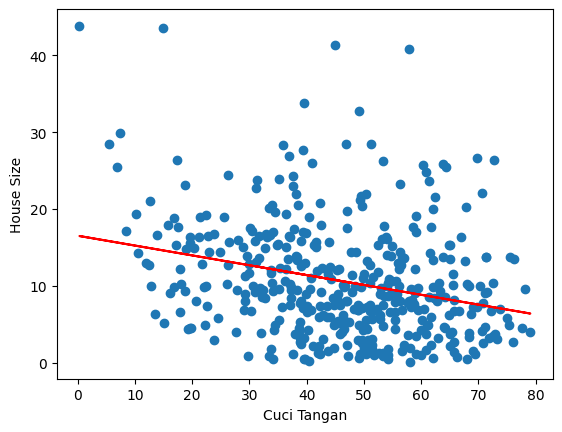

R square of Cuci Tangan and House Size is 0.07397419569671804


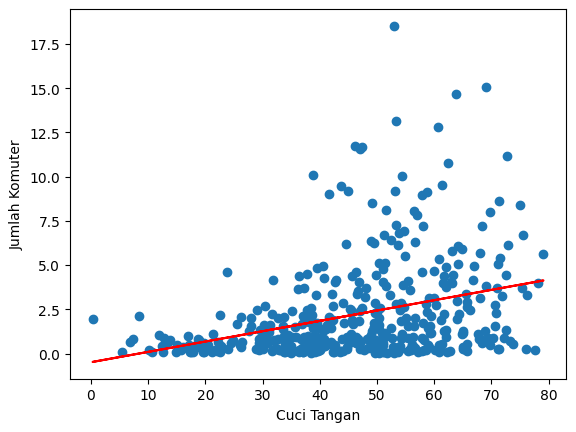

R square of Cuci Tangan and Jumlah Komuter is 0.11166906040474134


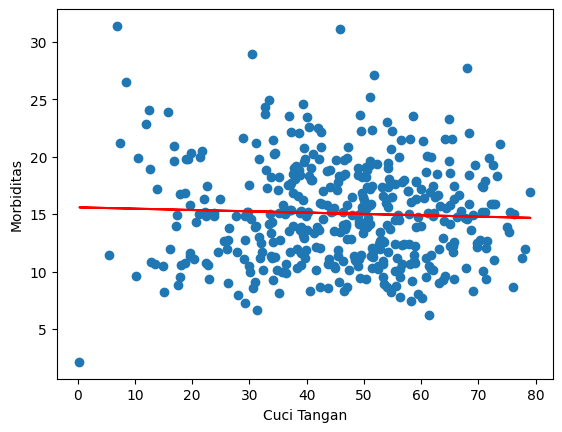

R square of Cuci Tangan and Morbiditas is 0.0017470012884771569


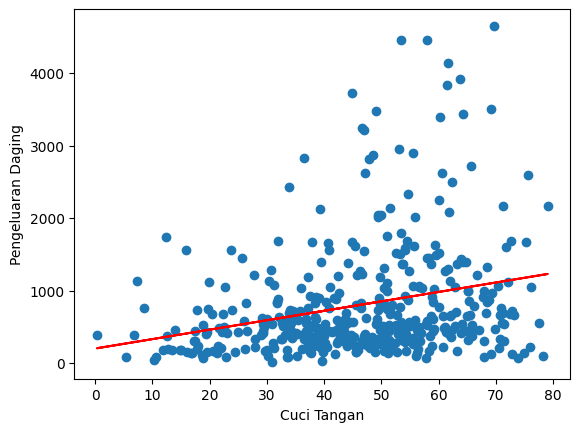

R square of Cuci Tangan and Pengeluaran Daging is 0.06844495106661941


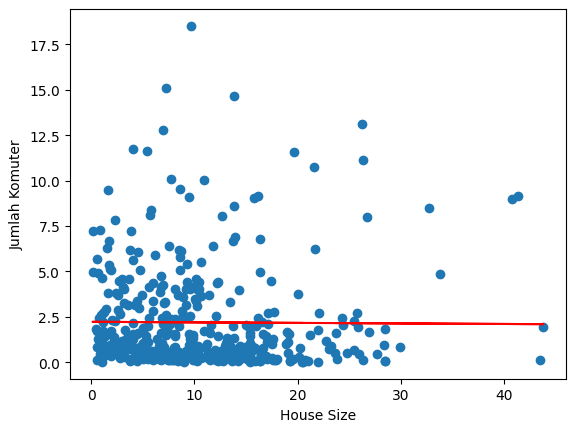

R square of House Size and Jumlah Komuter is 6.312334719005275e-05


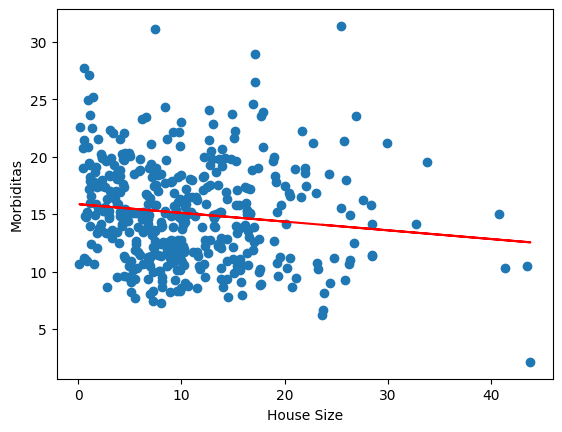

R square of House Size and Morbiditas is 0.016710370576187517


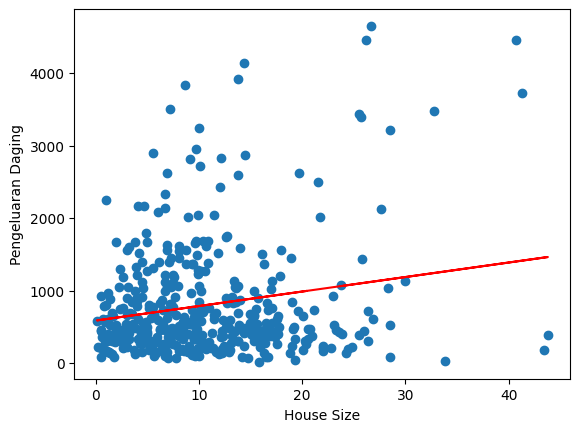

R square of House Size and Pengeluaran Daging is 0.035846854656781724


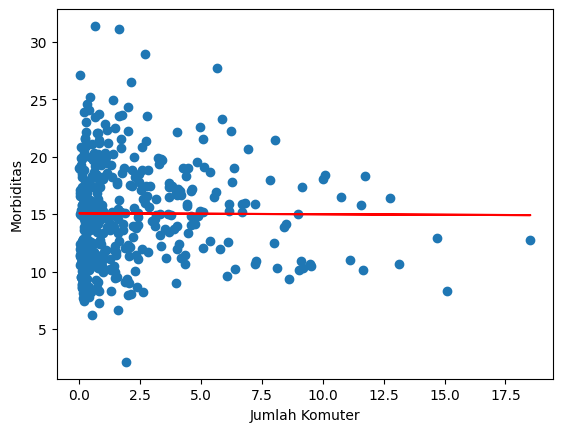

R square of Jumlah Komuter and Morbiditas is 3.207879547373338e-05


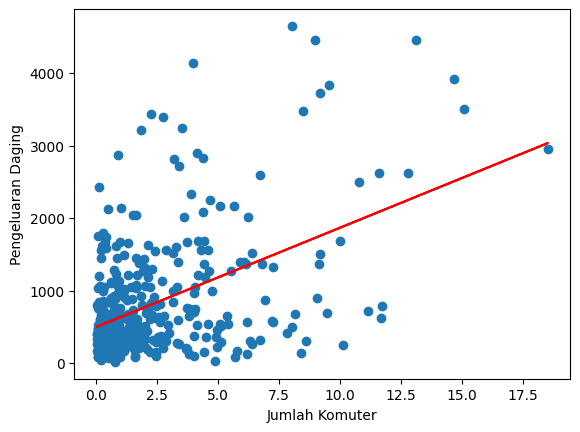

R square of Jumlah Komuter and Pengeluaran Daging is 0.23221742265018996


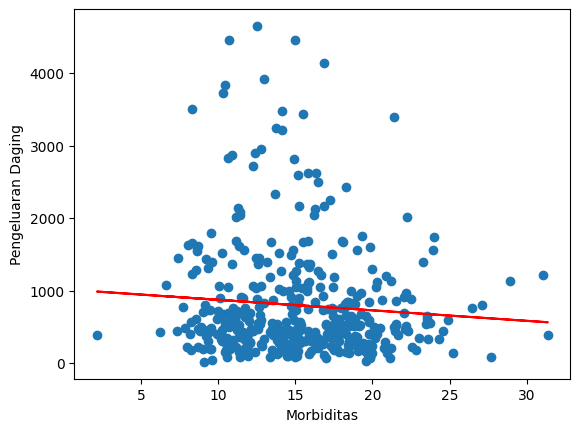

R square of Morbiditas and Pengeluaran Daging is 0.006459140866554192


In [170]:
from sklearn import linear_model

# scatter plot all features
feature = ['Cuci Tangan', 'House Size', 'Jumlah Komuter', 'Morbiditas', 'Pengeluaran Daging']

for i in range(5):
    for j in range(i+1, 5):
        # Create regression line
        regr = linear_model.LinearRegression()
        x = final_df[feature[i]].values.reshape(-1, 1)
        y = final_df[feature[j]].values.reshape(-1, 1)
        regr.fit(x, y)
        y_pred = regr.predict(x)
        # Plot
        plt.plot(x, y_pred, color='red')

        if i == j:
            continue
        plt.scatter(final_df[feature[i]], final_df[feature[j]])
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
        plt.show()

        # Print r square
        print('R square of ' + feature[i] + ' and ' + feature[j] + ' is ' + str(regr.score(x, y)))


10
25


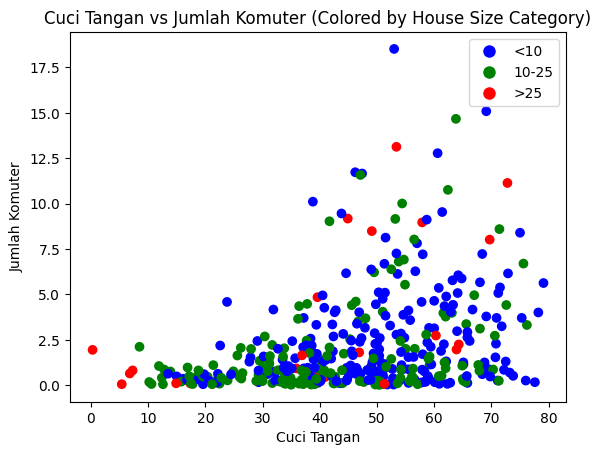

R square of Cuci Tangan and Jumlah Komuter is 0.11166906040474134


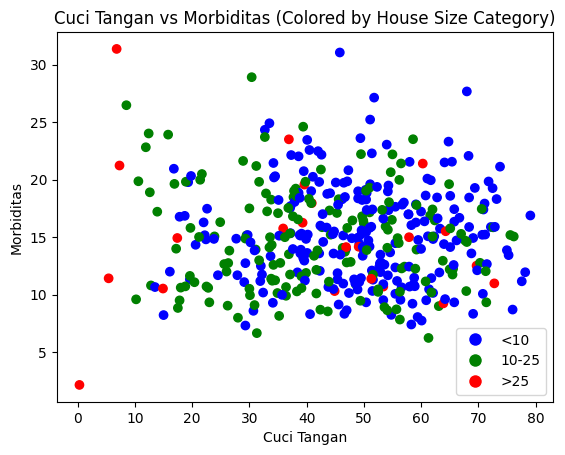

R square of Cuci Tangan and Morbiditas is 0.0017470012884771569


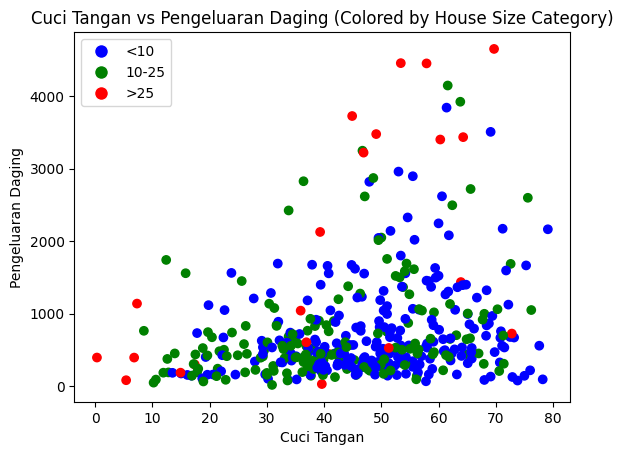

R square of Cuci Tangan and Pengeluaran Daging is 0.06844495106661941


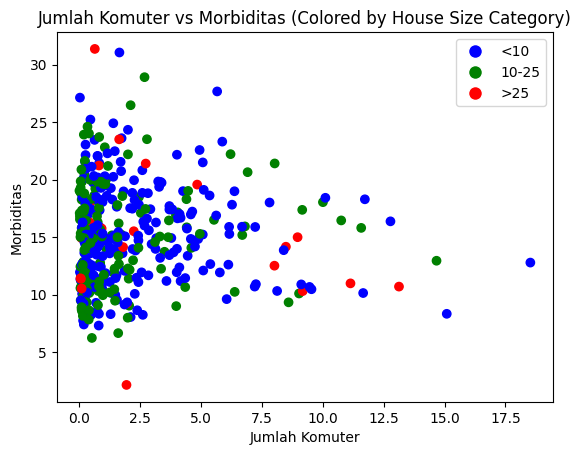

R square of Jumlah Komuter and Morbiditas is 3.207879547373338e-05


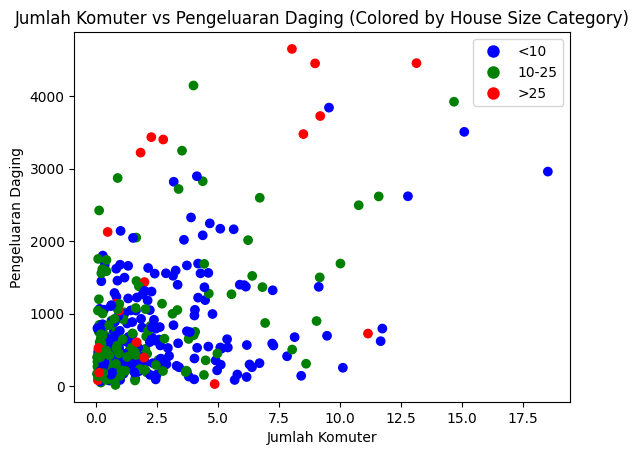

R square of Jumlah Komuter and Pengeluaran Daging is 0.23221742265018996


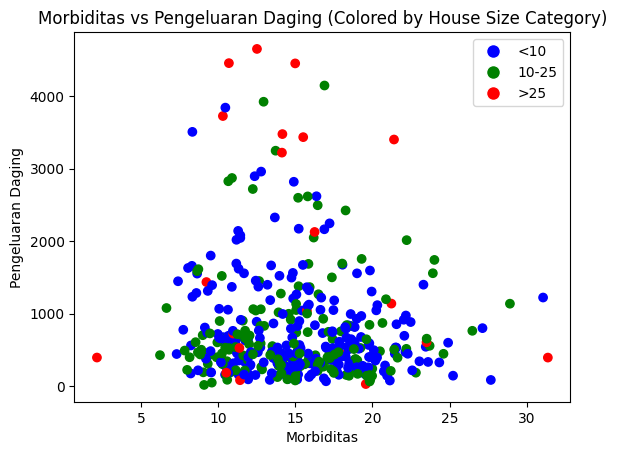

R square of Morbiditas and Pengeluaran Daging is 0.006459140866554192


In [171]:
# Convert 'House Size' to numeric if needed
final_df['House Size'] = pd.to_numeric(final_df['House Size'], errors='coerce')

# 33% of data lower than this value
# lowervalue = final_df['House Size'].quantile(0.33)
# uppervalue = final_df['House Size'].quantile(0.66)

print(lowervalue)
print(uppervalue)

for i in range(5):
    for j in range(i + 1, 5):
        if i == j:
            continue
        # if i or j is House Size, skip
        if feature[i] == 'House Size' or feature[j] == 'House Size':
            continue
        # Create categories for House Size
        categories = pd.cut(final_df['House Size'], bins=[float('-inf'), lowervalue, uppervalue, float('inf')], labels=['<10', '10-25', '>25'])

        # Create a dictionary to map categories to colors
        color_map = {'<10': 'blue', '10-25': 'green', '>25': 'red'}

        # Map categories to colors
        colors = categories.map(color_map)

        # Plot with categories as colors
        plt.scatter(final_df[feature[i]], final_df[feature[j]], c=colors)

        # Create a legend
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[cat], markersize=10, label=cat) for cat in color_map]
        plt.legend(handles=legend_elements)

        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
        plt.title(f'{feature[i]} vs {feature[j]} (Colored by House Size Category)')
        plt.show()

        # Create regression line (optional)
        regr = linear_model.LinearRegression()
        x = final_df[feature[i]].values.reshape(-1, 1)
        y = final_df[feature[j]].values.reshape(-1, 1)
        regr.fit(x, y)
        y_pred = regr.predict(x)

        # Print r square (optional)
        print('R square of ' + feature[i] + ' and ' + feature[j] + ' is ' + str(regr.score(x, y)))

In [172]:
# Normalize the data except for House Size
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_df[['Cuci Tangan', 'Jumlah Komuter', 'Morbiditas', 'Pengeluaran Daging']] = scaler.fit_transform(final_df[['Cuci Tangan', 'Jumlah Komuter', 'Morbiditas', 'Pengeluaran Daging']])

# Create a new column for House Size Category (<10, 10-25, >25)
final_df['House Size Category'] = pd.cut(final_df['House Size'], bins=[float('-inf'), 10, 25, float('inf')], labels=['<10', '10-25', '>25'])

# Drop House Size
final_df = final_df.drop('House Size', axis=1)

In [173]:
# One hot encode House Size Category

final_df = pd.get_dummies(final_df, columns=['House Size Category'])

print(final_df.head())
final_df.describe()

         Wilayah  Cuci Tangan  Jumlah Komuter  Morbiditas  Pengeluaran Daging  \
0   Aceh Singkil     0.230986       -0.775669    0.400126           -0.672864   
1  Aceh Tenggara    -1.656045       -0.750494    0.169853           -0.069686   
2     Aceh Timur    -0.322543       -0.628215    0.662319           -0.452403   
3    Aceh Tengah    -0.058359       -0.581462    1.070427           -0.294056   
4     Aceh Barat    -1.681206       -0.577865    1.077267           -0.503994   

   House Size Category_<10  House Size Category_10-25  House Size Category_>25  
0                    False                       True                    False  
1                    False                       True                    False  
2                    False                      False                     True  
3                     True                      False                    False  
4                     True                      False                    False  


,Cuci Tangan,Jumlah Komuter,Morbiditas,Pengeluaran Daging
count,4.210000e+02,4.210000e+02,4.210000e+02,4.210000e+02
mean,-2.658206e-16,-3.375500e-17,1.518975e-16,-1.012650e-16
std,1.001190e+00,1.001190e+00,1.001190e+00,1.001190e+00
min,-2.876325e+00,-7.828622e-01,-2.946820e+00,-9.911825e-01
25%,-6.496287e-01,-6.461975e-01,-7.900004e-01,-6.174322e-01
50%,6.744305e-02,-4.232182e-01,-3.306178e-02,-3.461564e-01
75%,7.467742e-01,2.349304e-01,6.737183e-01,2.503536e-01
max,2.080276e+00,5.870552e+00,3.721992e+00,4.873182e+00


In [174]:
# Train test split with y House Size Category
from sklearn.model_selection import train_test_split

X = final_df[['Cuci Tangan', 'Jumlah Komuter', 'Morbiditas', 'Pengeluaran Daging']]
y = final_df[['House Size Category_<10', 'House Size Category_10-25', 'House Size Category_>25']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (336, 4) (336, 3)
Test set: (85, 4) (85, 3)


[0.54117647 0.28235294 0.52941176 0.37647059 0.52941176 0.42352941
 0.56470588 0.47058824 0.57647059]


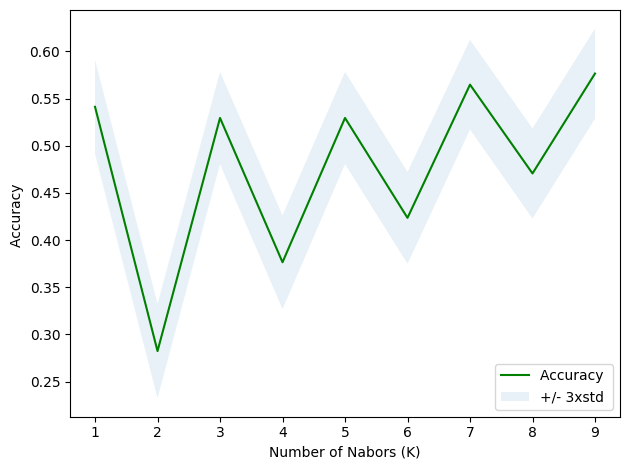

The best accuracy was with 0.5764705882352941 with k= 9


In [175]:
# K Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
ConfustionMx = [];

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    # ValueError: setting an array element with a sequence.
    # std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    std_acc[n - 1] = np.std(yhat == y_test.values) / np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)



[0.6        0.6        0.54117647 0.55294118 0.50588235 0.45882353
 0.54117647 0.56470588 0.48235294]


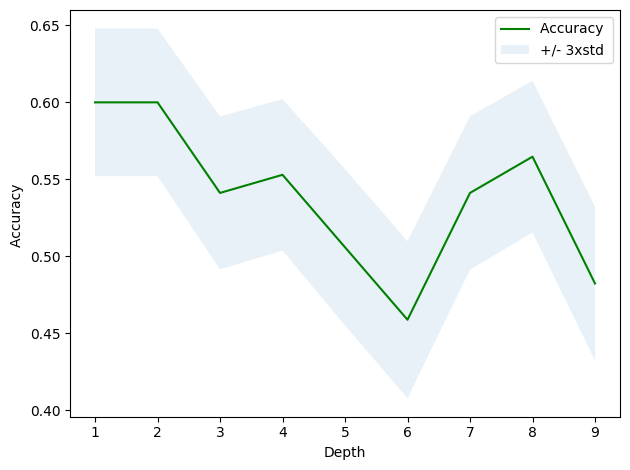

The best accuracy was with 0.6 with depth= 1


In [182]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

depths = 10
mean_acc = np.zeros((depths - 1))
std_acc = np.zeros((depths - 1))
ConfustionMx = [];

for n in range(1, depths):
    # Train Model and Predict
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, predTree)
    std_acc[n - 1] = np.std(predTree == y_test.values) / np.sqrt(predTree.shape[0])

print(mean_acc)

plt.plot(range(1, depths), mean_acc, 'g')
plt.fill_between(range(1, depths), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

print("The best accuracy was with", mean_acc.max(), "with depth=", mean_acc.argmax() + 1)

In [ ]:
# Belum multiclass
# # Support Vector Machine
# from sklearn import svm
# from sklearn.metrics import jaccard_score
# from sklearn.metrics import f1_score

# # rbf, with one shot encoding

# clf_rbf = svm.SVC(kernel='rbf')
# # ValueError: y should be a 1d array, got an array of shape (336, 3) instead.Cell Execution Error
# # clf_rbf.fit(X_train, y_train)
# clf_rbf.fit(X_train, y_train['House Size Category_<10'])
# yhat_rbf = clf_rbf.predict(X_test)

# print("Avg F1-score: %.4f" % f1_score(y_test['House Size Category_<10'], yhat_rbf, average='weighted'))
# print("Jaccard score: %.4f" % jaccard_score(y_test['House Size Category_<10'], yhat_rbf, average='weighted'))

Avg F1-score: 0.6203
Jaccard score: 0.4531


In [ ]:
# # Logistic Regression, belum multiclass
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss
# from sklearn.metrics import jaccard_score
# from sklearn.metrics import f1_score


# # one shot encoding
# LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train['House Size Category_<10'])
# yhat = LR.predict(X_test)
# yhat_prob = LR.predict_proba(X_test)

# print("Avg F1-score: %.4f" % f1_score(y_test['House Size Category_<10'], yhat, average='weighted'))
# print("Jaccard score: %.4f" % jaccard_score(y_test['House Size Category_<10'], yhat, average='weighted'))
# print("LogLoss: %.4f" % log_loss(y_test['House Size Category_<10'], yhat_prob))

# # one shot encoding
# LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train['House Size Category_10-25'])
# yhat = LR.predict(X_test)
# yhat_prob = LR.predict_proba(X_test)

# print("Avg F1-score: %.4f" % f1_score(y_test['House Size Category_10-25'], yhat, average='weighted'))
# print("Jaccard score: %.4f" % jaccard_score(y_test['House Size Category_10-25'], yhat, average='weighted'))
# print("LogLoss: %.4f" % log_loss(y_test['House Size Category_10-25'], yhat_prob))

# # one shot encoding
# LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train['House Size Category_>25'])
# yhat = LR.predict(X_test)
# yhat_prob = LR.predict_proba(X_test)

# print("Avg F1-score: %.4f" % f1_score(y_test['House Size Category_>25'], yhat, average='weighted'))
# print("Jaccard score: %.4f" % jaccard_score(y_test['House Size Category_>25'], yhat, average='weighted'))
# print("LogLoss: %.4f" % log_loss(y_test['House Size Category_>25'], yhat_prob))




Avg F1-score: 0.6604
Jaccard score: 0.4990
LogLoss: 0.6582
Avg F1-score: 0.6324
Jaccard score: 0.4787
LogLoss: 0.6620
Avg F1-score: 0.9474
Jaccard score: 0.9307
LogLoss: 0.3838
